In [1]:
import pandas as pd
import numpy as np
import datetime

In [2]:
data_path = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [3]:
!wget $data

wget : URL manquante
Utilisation : wget [OPTION]… [URL]…

Utilisez « wget --help » pour obtenir plus de renseignements.


In [4]:
df = pd.read_csv('data.csv')

## 2. Data Preparation

In [5]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [7]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [8]:
object_columns = df.dtypes[df.dtypes == 'object'].index
for column in object_columns:
    df[column] = df[column].str.lower().str.replace(' ', '_')

In [9]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## Exploratory data analysis

In [10]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
help(sns.histplot)

Help on function histplot in module seaborn.distributions:

histplot(data=None, *, x=None, y=None, hue=None, weights=None, stat='count', bins='auto', binwidth=None, binrange=None, discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None, **kwargs)
    Plot univariate or bivariate histograms to show distributions of datasets.
    
    A histogram is a classic visualization tool that represents the distribution
    of one or more variables by counting the number of observations that fall within
    discrete bins.
    
    This function can normalize the statistic computed within each bin to estimate
    frequency, density or probability mass, and it can add a smooth curve obtained
    using a kernel density estimate

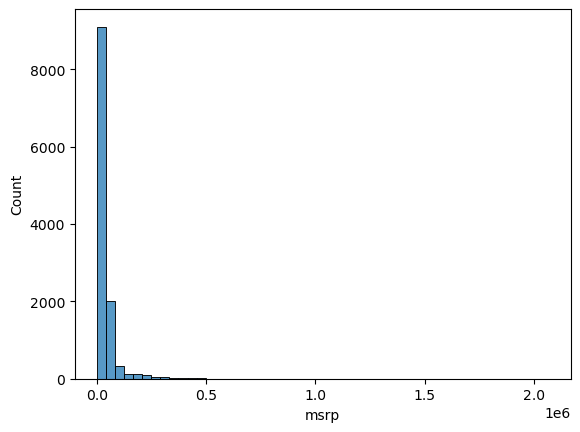

In [13]:
sns.histplot(df.msrp, bins=50)
plt.show()

In [14]:
pd.set_option('float_format', '{:f}'.format)

In [15]:
df.msrp.describe()

count     11914.000000
mean      40594.737032
std       60109.103604
min        2000.000000
25%       21000.000000
50%       29995.000000
75%       42231.250000
max     2065902.000000
Name: msrp, dtype: float64

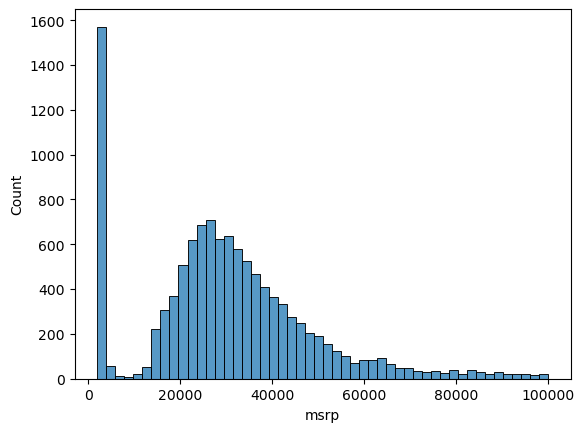

In [16]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)
plt.show()

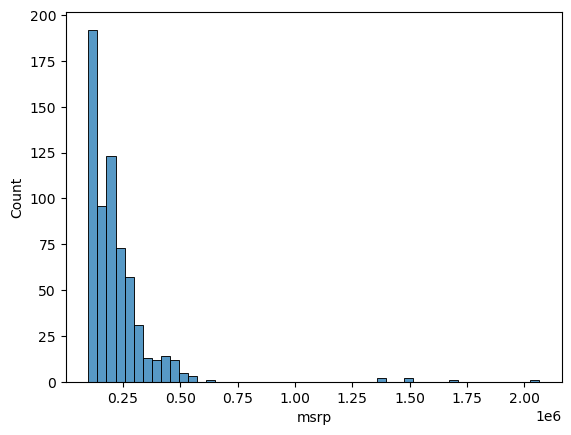

In [17]:
sns.histplot(df.msrp[df.msrp >= 100000], bins=50)
plt.show()

In [18]:
np.log([1, 1, 10, 100, 1000, 10000, 1000000]) - np.log1p([0, 1, 10, 100, 1000, 10000, 1000000])

array([ 0.00000000e+00, -6.93147181e-01, -9.53101798e-02, -9.95033085e-03,
       -9.99500333e-04, -9.99950003e-05, -9.99999500e-07])

Apply log to skewed distribution

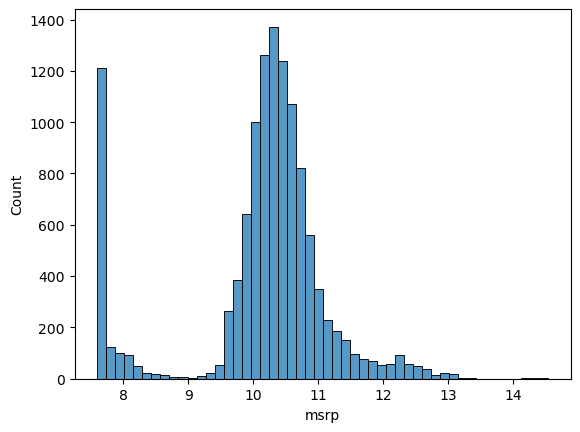

In [19]:
sns.histplot(np.log1p(df.msrp), bins=50)
plt.show()

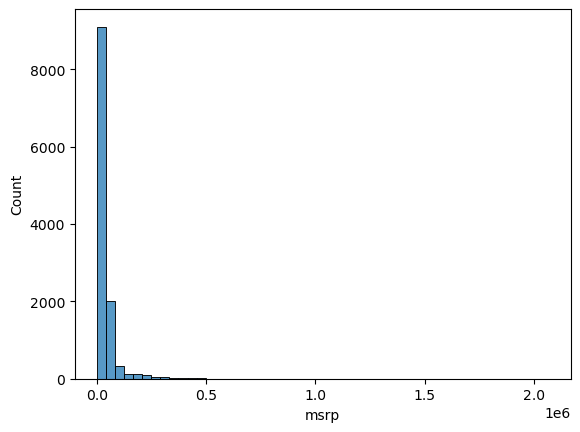

In [20]:
sns.histplot(df.msrp, bins=50)
plt.show()

As we can see, after apply log, df.msrp goes from very right-skewed distribution to normal distribution.

Check missing values

In [21]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## Setting up the validation framework

In [22]:
n = len(df)

### Split into train, validation and test

In [23]:
n_train = int(n * 0.6)
n_val = int(n * 0.2)
n_test = n - n_train - n_val

In [24]:
print(n_train, n_val, n_test, n_train + n_val + n_test - n)

7148 2382 2384 0


In [25]:
help(np.arange)

Help on built-in function arange in module numpy:

arange(...)
    arange([start,] stop[, step,], dtype=None, *, like=None)
    
    Return evenly spaced values within a given interval.
    
    ``arange`` can be called with a varying number of positional arguments:
    
    * ``arange(stop)``: Values are generated within the half-open interval
      ``[0, stop)`` (in other words, the interval including `start` but
      excluding `stop`).
    * ``arange(start, stop)``: Values are generated within the half-open
      interval ``[start, stop)``.
    * ``arange(start, stop, step)`` Values are generated within the half-open
      interval ``[start, stop)``, with spacing between values given by
      ``step``.
    
    For integer arguments the function is roughly equivalent to the Python
    built-in :py:class:`range`, but returns an ndarray rather than a ``range``
    instance.
    
    When using a non-integer step, such as 0.1, it is often better to use
    `numpy.linspace`.
    
    S

In [26]:
idx = np.arange(n)

In [27]:
np.random.seed(2)
np.random.shuffle(idx)

In [28]:
help(df.iloc)

Help on _iLocIndexer in module pandas.core.indexing object:

class _iLocIndexer(_LocationIndexer)
 |  Purely integer-location based indexing for selection by position.
 |  
 |  .. deprecated:: 2.2.0
 |  
 |     Returning a tuple from a callable is deprecated.
 |  
 |  ``.iloc[]`` is primarily integer position based (from ``0`` to
 |  ``length-1`` of the axis), but may also be used with a boolean
 |  array.
 |  
 |  Allowed inputs are:
 |  
 |  - An integer, e.g. ``5``.
 |  - A list or array of integers, e.g. ``[4, 3, 0]``.
 |  - A slice object with ints, e.g. ``1:7``.
 |  - A boolean array.
 |  - A ``callable`` function with one argument (the calling Series or
 |    DataFrame) and that returns valid output for indexing (one of the above).
 |    This is useful in method chains, when you don't have a reference to the
 |    calling object, but would like to base your selection on
 |    some value.
 |  - A tuple of row and column indexes. The tuple elements consist of one of the
 |    abov

In [29]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[-n_test:]]

In [30]:
print(len(df_train), n_train)
print(len(df_val), n_val)
print(len(df_test), n_test)

7148 7148
2382 2382
2384 2384


In [31]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.000000,4.000000,manual,front_wheel_drive,2.000000,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.000000,4.000000,automatic,front_wheel_drive,4.000000,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.000000,4.000000,automatic,all_wheel_drive,4.000000,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.000000,4.000000,manual,rear_wheel_drive,3.000000,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.000000,8.000000,automatic,four_wheel_drive,4.000000,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [32]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

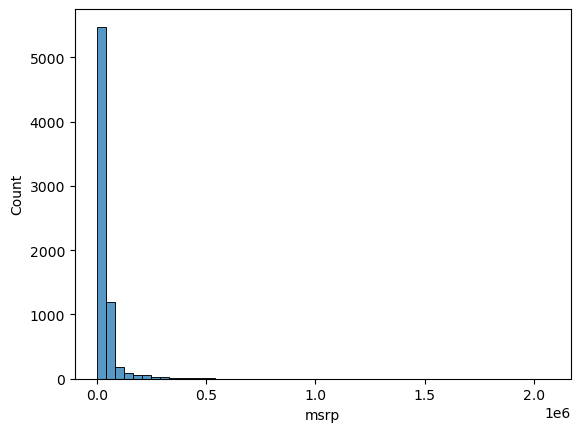

In [33]:
sns.histplot(df_train.msrp, bins=50)
plt.show()

In [34]:
y_train_og = df_train.msrp
y_val_og = df_val.msrp
y_test_og = df_test.msrp

In [35]:
y_train = np.log1p(df_train.msrp)
y_val = np.log1p(df_val.msrp)
y_test = np.log1p(df_test.msrp)

In [36]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [37]:
def train_linear_regression(X, y):
    X = np.column_stack([np.ones(X.shape[0]), X])
    XTX = np.dot(X.T, X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = np.dot(XTX_inv, X.T).dot(y)
    
    w0 = w_full[0]
    w = w_full[1:]
    
    return w0, w

In [38]:
X = [[148, 24, 1385], [132, 25, 20311], [453, 11, 86], [158, 24, 185], [172, 25, 201], [413, 11, 86], [38, 54, 185], [142, 25, 431], [453, 31, 86], ]
X = np.array(X)
X

array([[  148,    24,  1385],
       [  132,    25, 20311],
       [  453,    11,    86],
       [  158,    24,   185],
       [  172,    25,   201],
       [  413,    11,    86],
       [   38,    54,   185],
       [  142,    25,   431],
       [  453,    31,    86]])

In [39]:
y = [1100, 200, 150, 250, 100, 200, 150, 250, 120]

In [40]:
w0, w = train_linear_regression(X, y)
print(w0, w)

830.4347660408773 [-1.09795913e+00 -1.05792264e+01 -8.93426615e-03]


In [42]:
X.shape

(9, 3)

In [43]:
y_pred = w0 + X.dot(w)
y_pred

array([401.66142237, 239.55962092, 215.91944197, 401.40295043,
       375.30934793, 259.83780725, 215.7812544 , 406.19324068,
         4.33491405])

## Car price baseline model

In [44]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [45]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

df_train_base = df_train[base]

In [46]:
df_train_base.columns

Index(['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg',
       'popularity'],
      dtype='object')

In [47]:
df_train_base = df_train_base.fillna(0)

In [48]:
X_train = df_train_base.values

In [49]:
w0, w = train_linear_regression(X_train, y_train)
w.shape

(5,)

In [50]:
y_train_pred = w0 + X_train.dot(w)

<Axes: xlabel='msrp', ylabel='Count'>

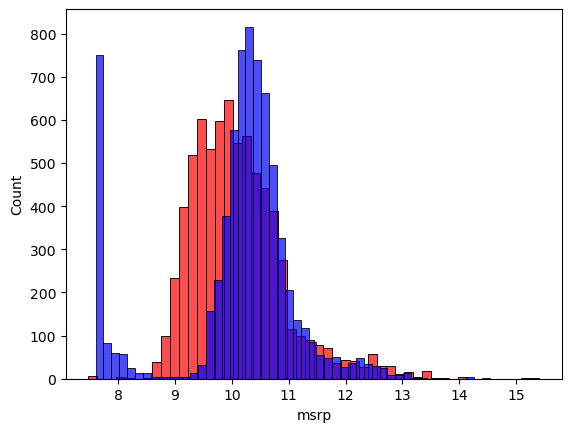

In [51]:
sns.histplot(y_train_pred, color='red', alpha=0.7, bins=50)
sns.histplot(y_train, color='blue', alpha=0.7, bins=50)

## RMSE

In [52]:
def rmse(y, y_pred):
    err = y - y_pred
    serr = err ** 2
    mse = serr.mean()
    return np.sqrt(mse)

In [53]:
rmse_train = rmse(y_train_pred, y_train)
rmse_train

0.7554591756909307

In [54]:
def prepare_X(df, base):
    df_base = df[base]
    df_base = df_base.fillna(0)
    X = df_base.values
    return X

In [55]:
X_val = prepare_X(df_val, base)
y_val_pred = w0 + X_val.dot(w)

In [56]:
rmse_val = rmse(y_val, y_val_pred)
rmse_val

0.7618297535729621

In [57]:
y_val

0      12.622481
1      10.540620
2      10.199361
3      10.908723
4       9.727705
          ...   
2377   11.377117
2378   10.851296
2379   10.484334
2380   11.889586
2381   11.217561
Name: msrp, Length: 2382, dtype: float64

<Axes: xlabel='msrp', ylabel='Count'>

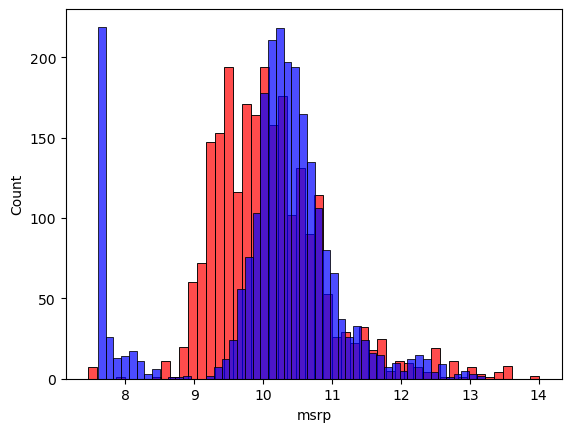

In [58]:
sns.histplot(y_val_pred, color='red', alpha=0.7, bins=50)
sns.histplot(y_val, color='blue', alpha=0.7, bins=50)

## Feature engineering

In [59]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [60]:
df_train.year

0       2008
1       2012
2       2016
3       1991
4       2017
        ... 
7143    2006
7144    2010
7145    2015
7146    2015
7147    2015
Name: year, Length: 7148, dtype: int64

In [61]:
def prepare_X(df, base):
    df = df.copy()
    base = base.copy()
    
    current_year = datetime.datetime.now().year
    df['age'] = current_year - df.year
    base = base + ['year']
    df_base = df[base]
    df_base = df_base.fillna(0)
    X = df_base.values
    return X

In [62]:
X_train = prepare_X(df_train, base)

In [63]:
X_train.shape

(7148, 6)

In [64]:
w0, w = train_linear_regression(X_train, y_train)
y_train_pred = w0 + X_train.dot(w)
rmse_train = rmse(y_train, y_train_pred)
rmse_train

0.5175461085504557

<Axes: xlabel='msrp', ylabel='Count'>

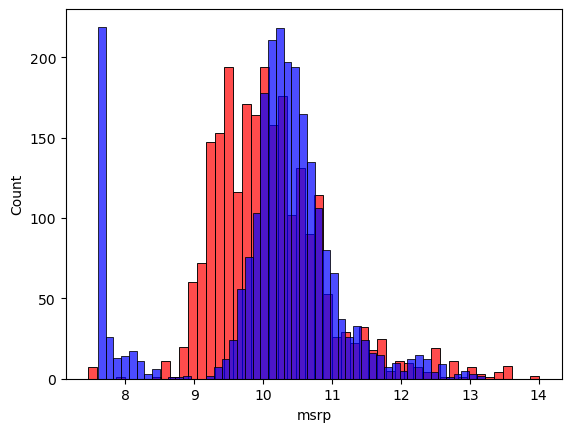

In [65]:
sns.histplot(y_val_pred, color='red', alpha=0.7, bins=50)
sns.histplot(y_val, color='blue', alpha=0.7, bins=50)

## Categorical variables

Add number of seats and brands to features

In [66]:
def prepare_X(df, features):
    df = df.copy()
    
    current_year = datetime.datetime.now().year
    df['age'] = current_year - df.year
    features = features + ['year']
    
    
    for v in [2, 3, 4]:
        df['is_num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('is_num_doors_%s' % v)
        
    make_values = list(df.make.value_counts().index)
    for v in make_values:
        df['is_make_%s' % v] = (df.make == v).astype('int')
        features.append('is_make_%s' % v)
    
    df_base = df[features]
    df_base = df_base.fillna(0)
    X = df_base.values
    return X

In [67]:
X_train = prepare_X(df_train, base)
w0, w = train_linear_regression(X_train, y_train)
y_train_pred = w0 + X_train.dot(w)
rmse_train = rmse(y_train, y_train_pred)
rmse_train

3157.947764945732

It is significantly worse.

Add only five most popular brands

In [68]:
def prepare_X(df, features):
    df = df.copy()
    
    current_year = datetime.datetime.now().year
    df['age'] = current_year - df.year
    features = features + ['year']
    
    for v in [2, 3, 4]:
        df['is_num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('is_num_doors_%s' % v)
        
    make_values = list(df_train.make.value_counts().head().index)
    for v in make_values:
        df['is_make_%s' % v] = (df.make == v).astype('int')
        features.append('is_make_%s' % v)
    
    df_base = df[features]
    df_base = df_base.fillna(0)
    X = df_base.values
    return X


In [69]:
X_train = prepare_X(df_train, base)
w0, w = train_linear_regression(X_train, y_train)
y_train_pred = w0 + X_train.dot(w)
rmse_train = rmse(y_train, y_train_pred)
rmse_train

0.505930401897355

In [70]:
cat_cols = ['make', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style']
cat_values = {}

for col in cat_cols:
    values = list(df['%s' % col].value_counts().head().index)
    cat_values[col] = []
    for v in values:
        cat_values[col].append(v)

In [71]:
cat_values

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [72]:
base

['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [73]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    current_year = datetime.datetime.now().year
    df['age'] = current_year - df.year
    features = features + ['year']
    
    for v in [2, 3, 4]:
        df['is_num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('is_num_doors_%s' % v)
    
    # cat_cols = list(df.dtypes[df.dtypes == 'object'].index)
    # print(cat_cols)
    for col in cat_cols:
        for v in cat_values[col]:
            df['is_%s_%s' % (col, v)] = (df['%s' % col] == v).astype('int')
            features.append('is_%s_%s' % (col, v))
        
    df_base = df[features]
    df_base = df_base.fillna(0)
    X = df_base.values
    return X

In [74]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
y_train_pred = w0 + X_train.dot(w)
rmse_train = rmse(y_train, y_train_pred)
rmse_train

259.28607937843697

In [75]:
w.shape

(41,)

In [76]:
X_train.shape

(7148, 41)

In [77]:
w

array([-9.37355539e-01,  2.55099011e+01, -6.87335839e+00,  1.28372776e+01,
       -2.71105270e-02,  2.40227382e+01, -5.38669471e+03, -5.53045855e+03,
       -5.46242210e+03,  6.15239023e+00,  1.15116291e+02, -5.50190648e+01,
       -8.69093464e+01,  6.72364721e+01, -2.77868639e+02, -3.03268346e+02,
       -3.76430595e+02, -3.36470919e+02, -3.98478130e+02,  4.46099513e+14,
        4.46099513e+14,  4.46099513e+14,  4.46099513e+14,  4.46099513e+14,
        2.01322129e+15,  2.01322129e+15,  2.01322129e+15,  2.01322129e+15,
       -5.79778399e+01, -6.12132153e+01,  8.52788715e+01,  6.87837705e+01,
       -9.39353240e+01, -2.16284481e+02, -1.23761123e+02, -1.55624726e+02,
       -4.88038194e-02,  5.45011387e-02,  1.78530411e-01,  3.42179360e-01,
       -1.64467986e-01])

When XTX is not invertible (XTX)^-1 does not exist because XTX is singular. How about when XTX is almost singular? X has columns that are nearly equal to each others, but as it is not the exact same, it is not *linearly dependent*. Thus, this results in very large or unstable w.

In [78]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [17, 5, 5],
    [4, 5, 5.00000001]
]
X = np.array(X)
XTX = X.T.dot(X)
XTX

array([[380.        , 161.        , 161.00000004],
       [161.        , 108.        , 108.00000005],
       [161.00000004, 108.00000005, 108.0000001 ]])

In [79]:
y = [1, 2, 3, 1, 2, 3]

In [80]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 7.13081369e-03,  5.07313158e+04, -5.07313158e+04],
       [ 5.07312887e+04, -2.05631903e+14,  2.05631903e+14],
       [-5.07312993e+04,  2.05631903e+14, -2.05631903e+14]])

In [81]:
np.set_printoptions(suppress=True)

In [82]:
XTX_inv.dot(X.T).dot(y)

array([       0.5404199 ,  2166485.71124046, -2166486.45611565])

So as we can see, w returns some very large number. This is the main culprit for our reduced performance, as 

In [83]:
help(np.eye)

Help on function eye in module numpy:

eye(N, M=None, k=0, dtype=<class 'float'>, order='C', *, like=None)
    Return a 2-D array with ones on the diagonal and zeros elsewhere.
    
    Parameters
    ----------
    N : int
      Number of rows in the output.
    M : int, optional
      Number of columns in the output. If None, defaults to `N`.
    k : int, optional
      Index of the diagonal: 0 (the default) refers to the main diagonal,
      a positive value refers to an upper diagonal, and a negative value
      to a lower diagonal.
    dtype : data-type, optional
      Data-type of the returned array.
    order : {'C', 'F'}, optional
        Whether the output should be stored in row-major (C-style) or
        column-major (Fortran-style) order in memory.
    
        .. versionadded:: 1.14.0
    like : array_like, optional
        Reference object to allow the creation of arrays which are not
        NumPy arrays. If an array-like passed in as ``like`` supports
        the ``__ar

In [84]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Eye gives us matrix valued 1. What we're trying to do here is to add constant number C to our XTX, so that the case above would not happen.

In [85]:
def train_linear_regression(X, y, r):
    X = np.column_stack([np.ones(X.shape[0]), X])
    XTX = np.dot(X.T, X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = np.dot(XTX_inv, X.T).dot(y)
    
    w0 = w_full[0]
    w = w_full[1:]
    
    return w0, w

In [86]:
X_train = prepare_X(df_train)
print(X_train.shape)
w0, w = train_linear_regression(X_train, y_train, 100)
y_train_pred = w0 + X_train.dot(w)
rmse_train = rmse(y_train, y_train_pred)
rmse_train

(7148, 41)


0.6350001319674741

In [87]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train, 0.001)
y_train_pred = w0 + X_train.dot(w)
rmse_train = rmse(y_train, y_train_pred)
rmse_train

0.46028517081734166

<Axes: xlabel='msrp', ylabel='Count'>

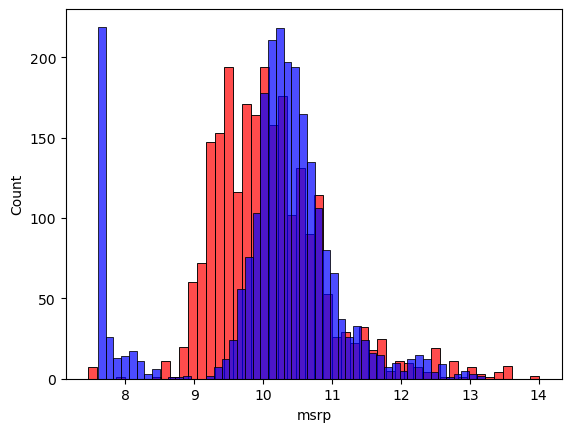

In [88]:
sns.histplot(y_val_pred, color='red', alpha=0.7, bins=50)
sns.histplot(y_val, color='blue', alpha=0.7, bins=50)

## Tuning the model

In [89]:
rmse_train_list = []
r_list = [0, 0.00000001, 0.00001, 0.001, 0.01, 0.1, 1, 10, 100, 100000]
r_label_list = [str(e) for e in r_list]
for r in r_list:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression(X_train, y_train, r)
    y_train_pred = w0 + X_train.dot(w)
    rmse_train = rmse(y_train, y_train_pred)
    rmse_train_list.append(rmse_train)

In [90]:
rmse_train_list

[259.28607937843697,
 0.46024623690126376,
 0.4602447331211371,
 0.46028517081734166,
 0.46340248160824404,
 0.5244133923114709,
 0.607887803534781,
 0.6275897469745201,
 0.6350001319674741,
 0.7484025704924038]

<Axes: >

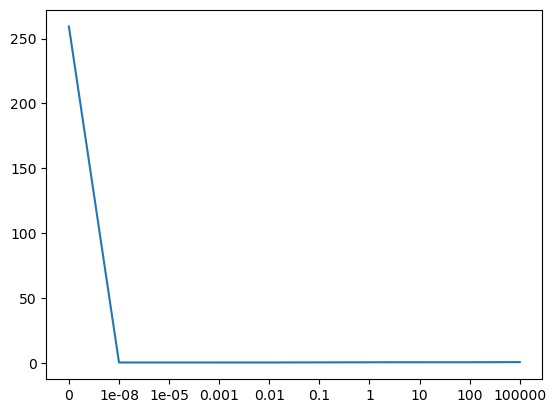

In [91]:
sns.lineplot(y=rmse_train_list, x=r_label_list)

<Axes: >

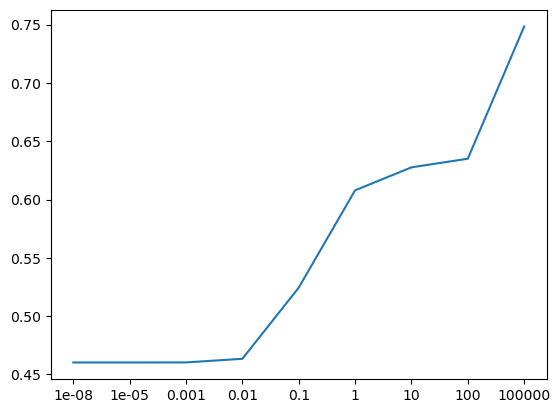

In [92]:
sns.lineplot(y=rmse_train_list[1:], x=r_label_list[1:])

## Using the model

In [93]:
df_train.shape

(7148, 15)

In [94]:
df_full_train = pd.concat([df_train, df_val])

In [95]:
df_full_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.000000,4.000000,manual,front_wheel_drive,2.000000,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.000000,4.000000,automatic,front_wheel_drive,4.000000,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.000000,4.000000,automatic,all_wheel_drive,4.000000,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.000000,4.000000,manual,rear_wheel_drive,3.000000,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.000000,8.000000,automatic,four_wheel_drive,4.000000,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,bmw,7_series,2015,premium_unleaded_(required),445.000000,8.000000,automatic,rear_wheel_drive,4.000000,"luxury,high-performance",large,sedan,25,17,3916
2378,volvo,xc90,2017,premium_unleaded_(recommended),316.000000,4.000000,automatic,all_wheel_drive,4.000000,"crossover,luxury,performance",large,4dr_suv,25,20,870
2379,volvo,v60,2015,regular_unleaded,240.000000,4.000000,automatic,front_wheel_drive,4.000000,luxury,midsize,wagon,37,25,870
2380,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.000000,8.000000,automatic,rear_wheel_drive,2.000000,"exotic,luxury,high-performance",midsize,convertible,20,13,238


In [96]:
df_full_train = df_full_train.reset_index(drop=True)

In [97]:
df_full_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.000000,4.000000,manual,front_wheel_drive,2.000000,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.000000,4.000000,automatic,front_wheel_drive,4.000000,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.000000,4.000000,automatic,all_wheel_drive,4.000000,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.000000,4.000000,manual,rear_wheel_drive,3.000000,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.000000,8.000000,automatic,four_wheel_drive,4.000000,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9525,bmw,7_series,2015,premium_unleaded_(required),445.000000,8.000000,automatic,rear_wheel_drive,4.000000,"luxury,high-performance",large,sedan,25,17,3916
9526,volvo,xc90,2017,premium_unleaded_(recommended),316.000000,4.000000,automatic,all_wheel_drive,4.000000,"crossover,luxury,performance",large,4dr_suv,25,20,870
9527,volvo,v60,2015,regular_unleaded,240.000000,4.000000,automatic,front_wheel_drive,4.000000,luxury,midsize,wagon,37,25,870
9528,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.000000,8.000000,automatic,rear_wheel_drive,2.000000,"exotic,luxury,high-performance",midsize,convertible,20,13,238


In [98]:
X_full_train = prepare_X(df_full_train)
X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [240.,   4.,  37., ...,   0.,   0.,   0.],
       [444.,   8.,  20., ...,   0.,   1.,   0.],
       [332.,   8.,  23., ...,   0.,   0.,   0.]])

In [99]:
y_full_train = np.concatenate([y_train, y_val])
y_full_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.48433352,
       11.88958635, 11.21756062])

In [100]:
w0, w = train_linear_regression(X_full_train, y_full_train, r=0.001)
w.shape

(41,)

In [101]:
y_full_train_pred = w0 + X_full_train.dot(w)

In [102]:
rmse_full_train = rmse(y_full_train, y_full_train_pred)
rmse_full_train

0.45898271919646916

<Axes: ylabel='Count'>

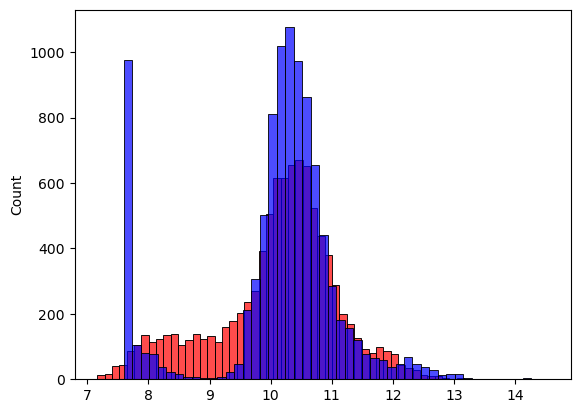

In [103]:
sns.histplot(y_full_train_pred, color='red', alpha=0.7, bins=50)
sns.histplot(y_full_train, color='blue', alpha=0.7, bins=50)

In [104]:
car = df_test.iloc[100].to_dict()
car

{'make': 'chevrolet',
 'model': 'colorado',
 'year': 2016,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 305.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'four_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': 'diesel',
 'vehicle_size': 'compact',
 'vehicle_style': 'crew_cab_pickup',
 'highway_mpg': 24,
 'city_mpg': 17,
 'popularity': 1385}

In [105]:
df_small = pd.DataFrame([car])
df_small.shape

(1, 15)

In [106]:
X_small = prepare_X(df_small)[0]
y_small_pred = w0 + X_small.dot(w)
suggestion = np.expm1(y_small_pred)
y_small = y_test_og[20]
print(f"Suggested y: {suggestion}")
print(f"Actual y: {y_small}")

Suggested y: 47382.61168160017
Actual y: 54240
